# On the importance of initialization and momentum in deep learning

Sutskever, I., Martens, J., Dahl, G. & Hinton, G. (2013). On the importance of initialization and  momentum in deep learning. Proceedings of the 30th International Conference on Machine Learning, 28(3):1139-1147. Available from: https://proceedings.mlr.press/v28/sutskever13.html.

## 1-
The empirical results show that NAG is more effective than CM at decelerating, thus making NAG more tolerant to large values of momentum term. Moreover, this behaviour can be observed for reasonably large values of learning rate (depending on the task).
## 2-
We investigate also the use of a slowly increasing schedule for the momentum term and how it can improve the robustness of the result and the generalization capability over a Nesterov method with a fixed momentum.

### n.b.
We used the ML CUP dataset to conduct experiments. No preprocessing on the data was performed

In [1]:
%load_ext autoreload
%autoreload 2
from neural import Neural
import numpy as np
import pandas as pd
from utilities import plot_TR_VAL, plot_compare, train_and_evaluate, compare_experiment,  train_and_evaluate_with_momentum
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from numpy import mean, std
from sklearn.model_selection import train_test_split

In [2]:
columns = ['id', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'y1', 'y2', 'y3']

df = pd.read_csv("CUP/ML-CUP23-TR.csv",header=None, names=columns, skiprows=7, sep=',').set_index('id')

X = df.iloc[:, :-3].to_numpy()
y = df.iloc[:, -3:].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# 0 - 
We define two neural network: nn_classic and nn_nesterov, with the same hyperparameters but different optimizers (respectively classic momentum and nesterov) and investigate the difference in term of MSE and generalization capability.

In [86]:
nn_classic = Neural(layers=[X_train.shape[1], 10, 10, y_train.shape[1]], 
            epochs=512, 
            learning_rate = 0.01,
            batch_size=64,
            hidden_function= "sigmoid",
            output_function = "linear",
            init_method = "he",
            optimizer = "classic",
            momentum = 0.95,
            momentum_schedule = False,
            l2_lambda = 0.0,
            patience = 10,
            early_stopping = True,
            verbose=0)

nn_classic.fit(X_train,y_train)
print(f"train error: {mean_squared_error(nn_classic.predict(X_train),y_train)}")
print(f"Test error: {mean_squared_error(nn_classic.predict(X_test),y_test)}")

train error: 6.648451470456586
Test error: 8.372045168936301


In [85]:
nn_nesterov = Neural(layers=[X_train.shape[1], 10, 10, y_train.shape[1]], 
            epochs=512, 
            learning_rate = 0.01,
            batch_size=64,
            hidden_function= "sigmoid",
            output_function = "linear",
            init_method = "he",
            optimizer = "nesterov",
            momentum = 0.95,
            momentum_schedule = False,
            l2_lambda = 0.0,
            patience = 10,
            early_stopping = True,
            verbose=0)

nn_nesterov.fit(X_train,y_train)
print(f"train error: {mean_squared_error(nn_nesterov.predict(X_train),y_train)}")
print(f"Test error: {mean_squared_error(nn_nesterov.predict(X_test),y_test)}")

train error: 2.0239999414863585
Test error: 2.6191984001597315


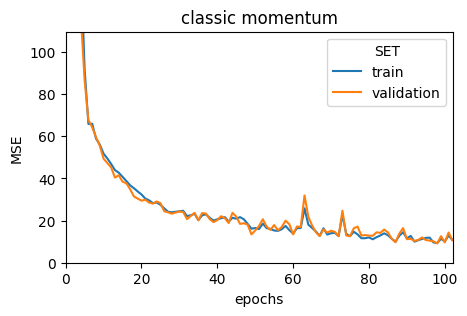

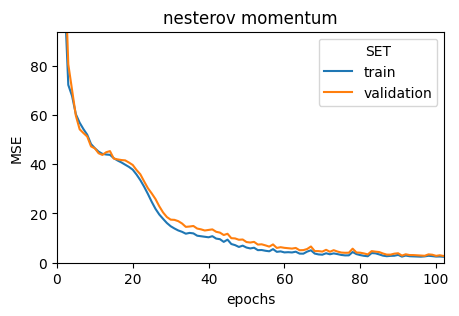

In [88]:
plot_TR_VAL(nn_classic, zoom_factor=5, curve='MSE', title='classic momentum', figsize=(5, 3))
plot_TR_VAL(nn_nesterov, zoom_factor=5, curve='MSE', title='nesterov momentum', figsize=(5, 3))

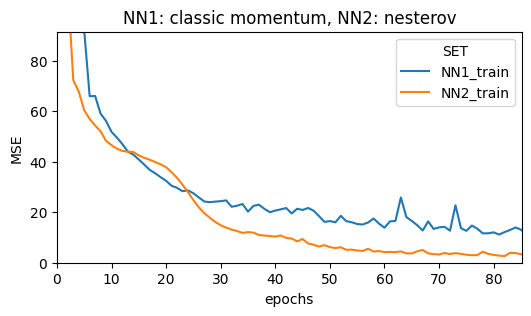

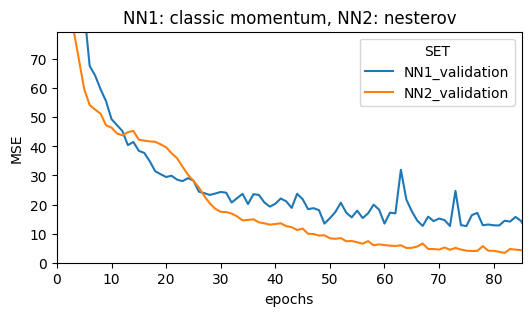

In [89]:
#Comparing the momentum vs accelerated
plot_compare(nn_classic, nn_nesterov, zoom_factor=6, figsize=(6,3), title1='NN1: classic momentum, NN2: nesterov', title2='NN1: classic momentum, NN2: nesterov')

### Numerical Experiments

In [69]:
train_and_evaluate(nn_classic, X_train, y_train, X_test, y_test, n_iterations=10)

Mean Train Loss      Mean Validation Loss Std Train Loss       Std Val Loss        
--------------------------------------------------------------------------------
1.4809               1.9341               0.3541               0.3924              


In [70]:
#compare the MSE on Train and Val for the two model: classical momentum and Nesterov

compare_experiment(nn_classic, nn_nesterov, X_train, y_train, X_test, y_test, n_iterations=15)

Model      Mean_Train_Loss      Mean_Val_Loss        Std_Train_Loss       Std_Val_Loss        
------------------------------------------------------------------------------------------
NN         1.2248               1.7374               0.4695               0.4223              
NN2        0.5616               0.8508               0.0583               0.0725              


# 1-
# The effect of increasing momentum term: Classic vs Nesterov

### With a low learning rate the difference is not obvious: we observe less oscillation in NAG but the performance both in training and validation is similar for the two methods.

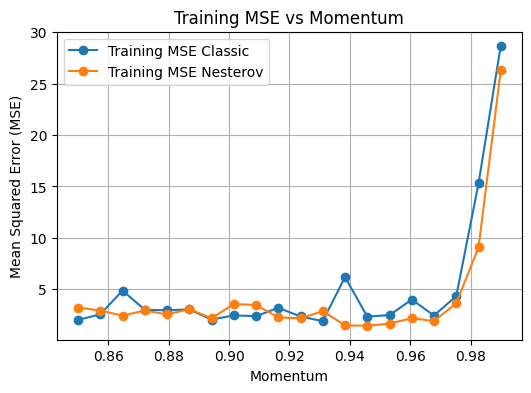

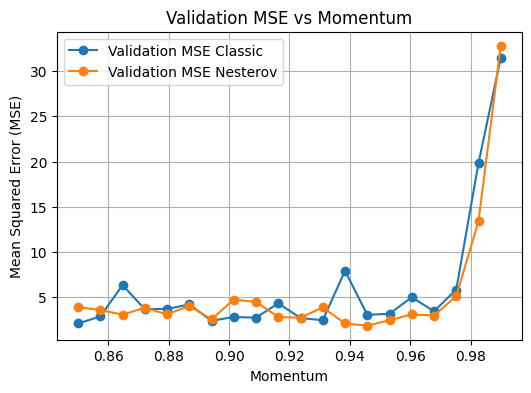

In [28]:
param = {
    'layers': [X_train.shape[1], 10, 10, y_train.shape[1]],
    'epochs': 256,
    'learning_rate': 0.002,
    'batch_size': 64,
    'hidden_function': 'sigmoid',
    'output_function': 'linear'
}

train_and_evaluate_with_momentum(param, X_train, y_train, X_test, y_test, momentum_start=0.85, trials=20)

### Using a reasonable large learning rate it is possible to notice the difference between the two method, as momentum term increases

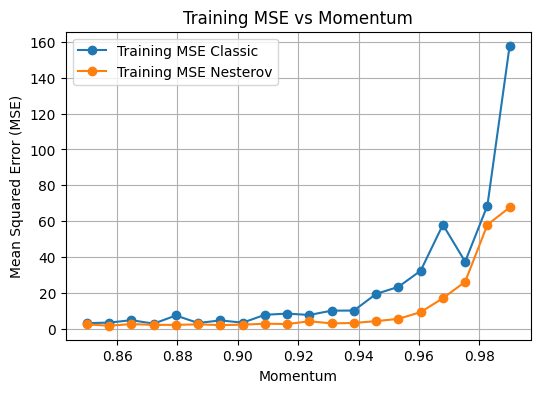

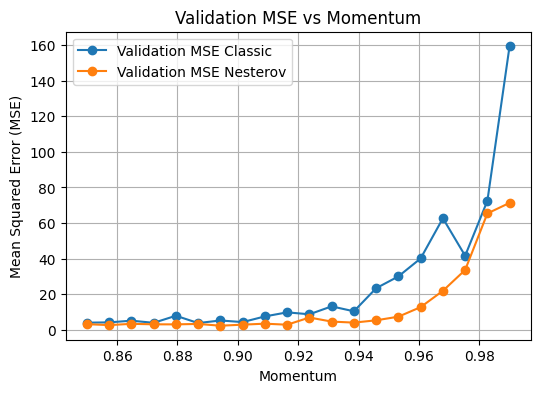

In [29]:
param = {
    'layers': [X_train.shape[1], 10, 10, y_train.shape[1]],
    'epochs': 256,
    'learning_rate': 0.02,
    'batch_size': 64,
    'hidden_function': 'sigmoid',
    'output_function': 'linear'
}

train_and_evaluate_with_momentum(param, X_train, y_train, X_test, y_test, momentum_start=0.85, trials=20)

# 2-
# The effectivness of the momentum schedule

In [3]:
nn_fixed_mu = Neural(layers=[X_train.shape[1], 32, 64, 32, y_train.shape[1]], 
            epochs=512, 
            learning_rate = 0.005,
            batch_size=64,
            hidden_function= "sigmoid",
            output_function = "linear",
            init_method = "he",
            optimizer = "nesterov",
            momentum = 0.9,
            momentum_schedule = False,
            l2_lambda = 0.0,
            patience = 10,
            early_stopping = True,
            verbose=0)

nn_fixed_mu.fit(X_train,y_train)
print(f"train error: {mean_squared_error(nn_fixed_mu.predict(X_train),y_train)}")
print(f"Test error: {mean_squared_error(nn_fixed_mu.predict(X_test),y_test)}")

train error: 0.16836782064117128
Test error: 0.3272794719183508


In [4]:
nn_schedule_mu = Neural(layers=[X_train.shape[1], 32, 64, 32, y_train.shape[1]], 
            epochs=512, 
            learning_rate = 0.005,
            batch_size=64,
            hidden_function= "sigmoid",
            output_function = "linear",
            init_method = "he",
            optimizer = "nesterov",
            momentum = 0.0,
            momentum_schedule = True,
            l2_lambda = 0.0,
            patience = 10,
            early_stopping = True,
            verbose=0)

nn_schedule_mu.fit(X_train,y_train)
print(f"train error: {mean_squared_error(nn_schedule_mu.predict(X_train),y_train)}")
print(f"Test error: {mean_squared_error(nn_schedule_mu.predict(X_test),y_test)}")

train error: 0.06353258407983355
Test error: 0.15859739361639066


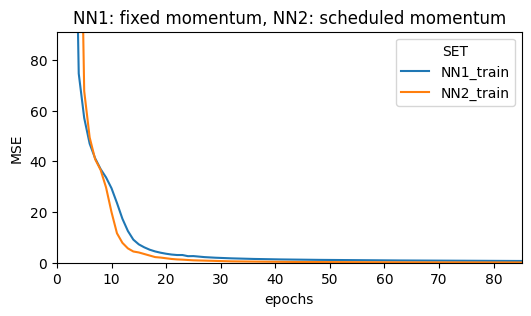

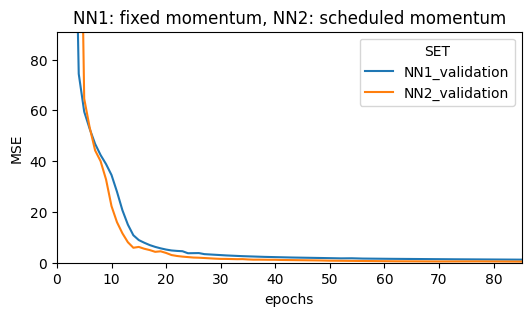

In [5]:
plot_compare(nn_fixed_mu, nn_schedule_mu, zoom_factor=6, figsize=(6,3), title1='NN1: fixed momentum, NN2: scheduled momentum', title2='NN1: fixed momentum, NN2: scheduled momentum')

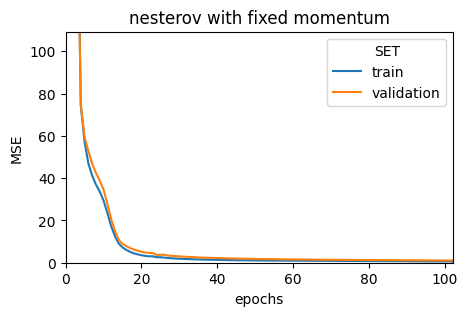

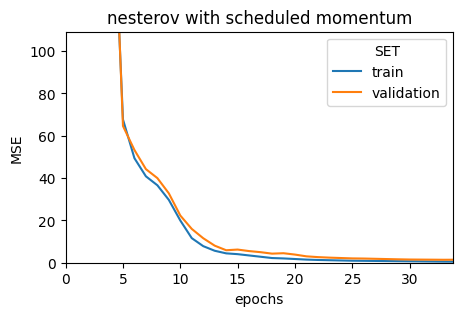

In [7]:
plot_TR_VAL(nn_fixed_mu, zoom_factor=5, curve='MSE', title='nesterov with fixed momentum', figsize=(5, 3))
plot_TR_VAL(nn_schedule_mu, zoom_factor=5, curve='MSE', title='nesterov with scheduled momentum', figsize=(5, 3))

###  Numerical experiment to compare different momentum values with momentum schedule

In [8]:
#NN: fixed momentum (0.9), NN2: scheduled momentum
compare_experiment(nn_fixed_mu, nn_schedule_mu, X_train, y_train, X_test, y_test, n_iterations=20)

Model      Mean_Train_Loss      Mean_Val_Loss        Std_Train_Loss       Std_Val_Loss        
------------------------------------------------------------------------------------------
NN         0.1809               0.3200               0.0425               0.0639              
NN2        0.0613               0.1803               0.0253               0.0340              


In [9]:
# 20 trials with momentum = 0.95

nn_fixed_mu = Neural(layers=[X_train.shape[1], 32, 64, 32, y_train.shape[1]], 
            epochs=512, 
            learning_rate = 0.005,
            batch_size=64,
            hidden_function= "sigmoid",
            output_function = "linear",
            init_method = "he",
            optimizer = "nesterov",
            momentum = 0.95,
            momentum_schedule = False,
            l2_lambda = 0.0,
            patience = 10,
            early_stopping = True,
            verbose=0)

train_and_evaluate(nn_fixed_mu, X_train, y_train, X_test, y_test, n_iterations=20)

Mean Train Loss      Mean Test Loss       Std Train Loss       Std Test Loss       
--------------------------------------------------------------------------------
0.1290               0.2630               0.0191               0.0390              


In [11]:
# 20 trials with momentum = 0.98

nn_fixed_mu = Neural(layers=[X_train.shape[1], 32, 64, 32, y_train.shape[1]], 
            epochs=512, 
            learning_rate = 0.005,
            batch_size=64,
            hidden_function= "sigmoid",
            output_function = "linear",
            init_method = "he",
            optimizer = "nesterov",
            momentum = 0.98,
            momentum_schedule = False,
            l2_lambda = 0.0,
            patience = 10,
            early_stopping = True,
            verbose=0)

train_and_evaluate(nn_fixed_mu, X_train, y_train, X_test, y_test, n_iterations=20)

Mean Train Loss      Mean Test Loss       Std Train Loss       Std Test Loss       
--------------------------------------------------------------------------------
17.4101              18.2201              33.6495              33.0431             


## The importance of the initialization of the network

In [10]:
nn_init.reset()
# Random initialization

nn_init = Neural(layers=[X_train.shape[1], 32, 64, 32, y_train.shape[1]], 
            epochs=512, 
            learning_rate = 0.005,
            batch_size=64,
            hidden_function= "sigmoid",
            output_function = "linear",
            init_method = "rand",
            optimizer = "nesterov",
            momentum = 0.0,
            momentum_schedule = True,
            l2_lambda = 0.0,
            patience = 10,
            early_stopping = True,
            verbose=0)

train_and_evaluate(nn_init, X_train, y_train, X_test, y_test, n_iterations=20)

Mean Train Loss      Mean Test Loss       Std Train Loss       Std Test Loss       
--------------------------------------------------------------------------------
550.4700             547.9351             2.0107               5.6993              


In [8]:
nn_init.reset()
# Xavier initialization

nn_init = Neural(layers=[X_train.shape[1], 32, 64, 32, y_train.shape[1]], 
            epochs=512, 
            learning_rate = 0.005,
            batch_size=64,
            hidden_function= "sigmoid",
            output_function = "linear",
            init_method = "xavier",
            optimizer = "nesterov",
            momentum = 0.0,
            momentum_schedule = True,
            l2_lambda = 0.0,
            patience = 10,
            early_stopping = True,
            verbose=0)

train_and_evaluate(nn_init, X_train, y_train, X_test, y_test, n_iterations=20)

Mean Train Loss      Mean Test Loss       Std Train Loss       Std Test Loss       
--------------------------------------------------------------------------------
0.0864               0.2867               0.0535               0.1044              


In [9]:
nn_init.reset()
# Uniform (he) initialization

nn_init = Neural(layers=[X_train.shape[1], 32, 64, 32, y_train.shape[1]], 
            epochs=512, 
            learning_rate = 0.005,
            batch_size=64,
            hidden_function= "sigmoid",
            output_function = "linear",
            init_method = "he",
            optimizer = "nesterov",
            momentum = 0.0,
            momentum_schedule = True,
            l2_lambda = 0.0,
            patience = 10,
            early_stopping = True,
            verbose=0)

train_and_evaluate(nn_init, X_train, y_train, X_test, y_test, n_iterations=20)

Mean Train Loss      Mean Test Loss       Std Train Loss       Std Test Loss       
--------------------------------------------------------------------------------
0.0642               0.2174               0.0199               0.0349              
